In [1]:
import os
import datetime
import numpy as np
import pandas as pd


try:
    import matplotlib.pyplot as plt
    """
    the output of plotting commands is displayed inline within frontends like the Jupyter notebook,
    directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.
    """
    %matplotlib inline
except:
    pass

In [2]:
files = os.listdir('data')
print("There are {} csv files:".format(len(files)))
for name in files:
    print(name[:-4])

There are 31 csv files:
AAPL
AXP
BA
CAT
CSCO
CVX
DIS
DWDP
GS
HD
IBM
INTC
JNJ
JPM
KO
MCD
MMM
MRK
MSFT
NKE
PFE
PG
TRV
UNH
UTX
V
VZ
WBA
WMT
XOM
^DJI


In [3]:
dow_jones = pd.read_csv('data/^DJI.csv')
aapl = pd.read_csv('data/AAPL.csv')

In [4]:
print("dimensions of Dow Jones Industrial Average: ", dow_jones.shape)
dow_jones.head()

dimensions of Dow Jones Industrial Average:  (2518, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-11-24,8048.089844,8599.019531,8048.089844,8443.389648,8443.389648,491890000
1,2008-11-25,8445.139648,8607.379883,8281.459961,8479.469727,8479.469727,374020000
2,2008-11-26,8464.490234,8726.610352,8311.169922,8726.610352,8726.610352,283920000
3,2008-11-28,8724.700195,8831.349609,8672.690430,8829.040039,8829.040039,155510000
4,2008-12-01,8826.889648,8827.049805,8141.359863,8149.089844,8149.089844,321010000


In [5]:
print("dimensions of Dow Jones components: ", aapl.shape)
aapl.tail()

dimensions of Dow Jones components:  (2518, 6)


,date,close,volume,open,high,low
2513,12/1/2008,12.7043,230862519,13.0429,13.1814,12.7033
2514,11/28/2008,13.2386,75301403,13.5286,13.5371,13.1229
2515,11/26/2008,13.5714,224858127,12.8457,13.6071,12.8357
2516,11/25/2008,12.9714,308776603,13.5186,13.5300,12.5943
2517,11/24/2008,13.2786,360468748,12.1729,13.5414,12.1200


In [6]:
aapl['Date'] = pd.to_datetime(aapl.date)
aapl = aapl.sort_values(by=['Date'])
aapl.head()

,date,close,volume,open,high,low,Date
2517,11/24/2008,13.2786,360468748,12.1729,13.5414,12.1200,2008-11-24
2516,11/25/2008,12.9714,308776603,13.5186,13.5300,12.5943,2008-11-25
2515,11/26/2008,13.5714,224858127,12.8457,13.6071,12.8357,2008-11-26
2514,11/28/2008,13.2386,75301403,13.5286,13.5371,13.1229,2008-11-28
2513,12/1/2008,12.7043,230862519,13.0429,13.1814,12.7033,2008-12-01


In [7]:
asset_prices = pd.DataFrame(columns=['AAPL','AXP','BA','CAT','CSCO','CVX','DIS','DWDP','GS','HD',
                                    'IBM','INTC','JNJ','JPM','KO','MCD','MMM','MRK','MSFT','NKE',
                                    'PFE','PG','TRV','UNH','UTX','V','VZ','WBA','WMT','XOM',
                                    'DJI'],
                           index=dow_jones.Date)
# special cases
asset_prices.AAPL = np.array(aapl.close)
asset_prices.DJI = np.array(dow_jones['Adj Close'])
dwdp = pd.read_csv('data/DWDP.csv')
asset_prices.DWDP = np.array(dwdp['Adj Close'])
mrk = pd.read_csv('data/MRK.csv')
asset_prices.MRK = np.array(mrk['Adj Close'])

In [8]:
files_left = sorted(list(set(files) - set(['AAPL.csv', 'DWDP.csv', 'MRK.csv', '^DJI.csv'])))
print(len(files_left), files_left)

27 ['AXP.csv', 'BA.csv', 'CAT.csv', 'CSCO.csv', 'CVX.csv', 'DIS.csv', 'GS.csv', 'HD.csv', 'IBM.csv', 'INTC.csv', 'JNJ.csv', 'JPM.csv', 'KO.csv', 'MCD.csv', 'MMM.csv', 'MSFT.csv', 'NKE.csv', 'PFE.csv', 'PG.csv', 'TRV.csv', 'UNH.csv', 'UTX.csv', 'V.csv', 'VZ.csv', 'WBA.csv', 'WMT.csv', 'XOM.csv']


In [9]:
for name in files_left:
    df = pd.read_csv('data/'+name)
    df['Date'] = pd.to_datetime(df.date)
    df = df.sort_values(by=['Date'])
    asset_prices[name[:-4]] = np.array(df.close)

In [10]:
#asset_prices.to_csv('data/close.csv')
asset_prices

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2008-11-24,13.2786,21.18,40.75,36.34,16.40,74.30,22.20,13.190079,67.42,21.42,...,64.68,40.62,19.07,49.11,12.4300,27.7794,24.13,52.77,78.80,8443.389648
2008-11-25,12.9714,21.37,40.18,37.27,15.42,76.53,22.03,13.146806,71.78,22.25,...,63.18,40.45,20.73,47.13,12.3825,28.5736,23.81,54.68,78.11,8479.469727
2008-11-26,13.5714,22.30,41.28,39.33,16.39,79.93,22.50,13.644410,76.50,23.55,...,63.16,42.78,20.98,47.73,13.0000,30.4051,24.57,56.69,80.89,8726.610352
2008-11-28,13.2386,23.31,42.63,40.99,16.54,79.01,22.52,13.377581,78.99,23.11,...,64.35,43.65,21.01,48.53,13.1400,30.5078,24.74,55.88,80.15,8829.040039
2008-12-01,12.7043,19.64,39.88,36.58,14.96,72.02,20.33,12.930458,65.76,21.21,...,60.49,37.01,20.12,45.62,12.0125,28.6577,23.06,53.01,74.31,8149.089844
2008-12-02,13.2100,20.76,40.70,38.00,15.32,75.54,21.46,13.413642,65.00,21.85,...,61.44,40.16,20.32,46.06,12.4200,30.0220,23.65,53.45,77.61,8419.089844
2008-12-03,13.7000,21.87,40.47,39.65,16.01,74.74,21.94,13.593929,68.95,22.76,...,62.88,40.22,20.38,47.32,13.1100,31.0124,24.02,54.38,78.93,8591.690430
2008-12-04,13.0586,20.84,39.19,37.52,15.33,71.76,21.79,13.211710,67.53,23.22,...,61.25,38.82,19.90,47.16,12.7025,30.0406,24.47,55.11,76.27,8376.240234
2008-12-05,13.4286,21.78,39.53,38.26,15.94,74.42,22.77,13.702105,70.72,24.40,...,62.63,43.41,21.41,49.01,13.2950,31.0124,25.94,58.21,76.60,8635.419922


In [11]:
np.log(asset_prices.shift(1)).head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2008-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-25,2.586154,3.053057,3.707456,3.592919,2.797281,4.308111,3.100092,2.579465,4.210942,3.064325,...,4.169452,3.704261,2.948116,3.894063,2.520113,3.324295,3.183456,3.965943,4.366913,9.041139
2008-11-26,2.562747,3.061988,3.693369,3.618189,2.735665,4.337683,3.092405,2.576179,4.273606,3.102342,...,4.145988,3.700067,3.031582,3.852910,2.516284,3.352483,3.170106,4.001498,4.358118,9.045403
2008-11-28,2.607965,3.104587,3.720378,3.671988,2.796671,4.381151,3.113515,2.613330,4.337291,3.159126,...,4.145671,3.756071,3.043570,3.865560,2.564949,3.414610,3.201526,4.037598,4.393090,9.074132
2008-12-01,2.583137,3.148882,3.752558,3.713328,2.805782,4.369574,3.114404,2.593580,4.369321,3.140265,...,4.164337,3.776203,3.044999,3.882182,2.575661,3.417982,3.208421,4.023207,4.383900,9.085802


In [12]:
asset_returns = (np.log(asset_prices) - np.log(asset_prices.shift(1))).iloc[1:,:]
asset_returns.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2008-11-25,-0.023407,0.008931,-0.014086,0.025270,-0.061616,0.029572,-0.007687,-0.003286,0.062664,0.038017,...,-0.023464,-0.004194,0.083466,-0.041153,-0.003829,0.028188,-0.013350,0.035555,-0.008795,0.004264
2008-11-26,0.045218,0.042599,0.027009,0.053799,0.061006,0.043468,0.021110,0.037151,0.063685,0.056784,...,-0.000317,0.056004,0.011988,0.012650,0.048665,0.062127,0.031421,0.036100,0.034972,0.028729
2008-11-28,-0.024828,0.044296,0.032180,0.041341,0.009110,-0.011577,0.000888,-0.019750,0.032031,-0.018860,...,0.018666,0.020133,0.001429,0.016622,0.010712,0.003372,0.006895,-0.014391,-0.009190,0.011669
2008-12-01,-0.041196,-0.171314,-0.066683,-0.113826,-0.100402,-0.092631,-0.102306,-0.033995,-0.183310,-0.085793,...,-0.061859,-0.165015,-0.043284,-0.061836,-0.089713,-0.062560,-0.070322,-0.052726,-0.075654,-0.080140
2008-12-02,0.039034,0.055460,0.020353,0.038085,0.023779,0.047718,0.054093,0.036687,-0.011624,0.029728,...,0.015583,0.081683,0.009891,0.009599,0.033360,0.046508,0.025264,0.008266,0.043451,0.032595


In [13]:
len(asset_returns)

2517

In [14]:
from sklearn.preprocessing import StandardScaler

# standardize the log-returns: mean = 0, sigma = 1
standardized_asset_returns = StandardScaler().fit_transform(asset_returns.values)
standardized_asset_returns = pd.DataFrame(data=standardized_asset_returns,
                                         index=asset_returns.index,
                                         columns=asset_returns.columns.values)
standardized_asset_returns.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2008-11-25,-1.445093,0.396634,-0.889603,1.265145,-3.665218,2.054946,-0.548920,-0.174158,3.021673,2.634596,...,-2.322957,-0.329397,4.809265,-3.132900,-0.288499,2.391016,-0.851898,3.076640,-0.702885,0.386361
2008-11-26,2.615029,2.007100,1.564708,2.721270,3.582246,3.026156,1.348636,1.648613,3.071214,3.963832,...,-0.044742,3.938999,0.638740,0.925204,2.886417,5.300415,1.905802,3.124082,2.801750,2.845141
2008-11-28,-1.529168,2.088282,1.873554,2.085400,0.514995,-0.820876,0.016158,-0.916279,1.534793,-1.393961,...,1.823522,1.395496,0.022666,1.224764,0.590927,0.263622,0.395138,-1.273933,-0.734548,1.130597
2008-12-01,-2.497597,-8.225179,-4.030817,-5.834290,-5.957616,-6.485605,-6.783712,-1.558393,-8.917270,-6.134697,...,-6.101799,-11.732583,-2.586213,-4.692911,-5.482933,-5.388432,-4.361125,-4.613063,-6.056640,-8.096405
2008-12-02,2.249151,2.622298,1.167218,1.919213,1.381987,3.323185,3.522003,1.627677,-0.584111,2.047511,...,1.520117,5.759812,0.516421,0.695029,1.960754,3.961485,1.526560,0.699630,3.480675,3.233719


In [15]:
print("mean of AAPL before and after standardization: ", asset_returns.AAPL. mean(), standardized_asset_returns.AAPL.mean())
print("std of AAPL before and after standardization: ", asset_returns.AAPL. std(), standardized_asset_returns.AAPL.std())

mean of AAPL before and after standardization:  0.0010182858111799883 -4.410897992153979e-18
std of AAPL before and after standardization:  0.01690543258877368 1.0001987083973913


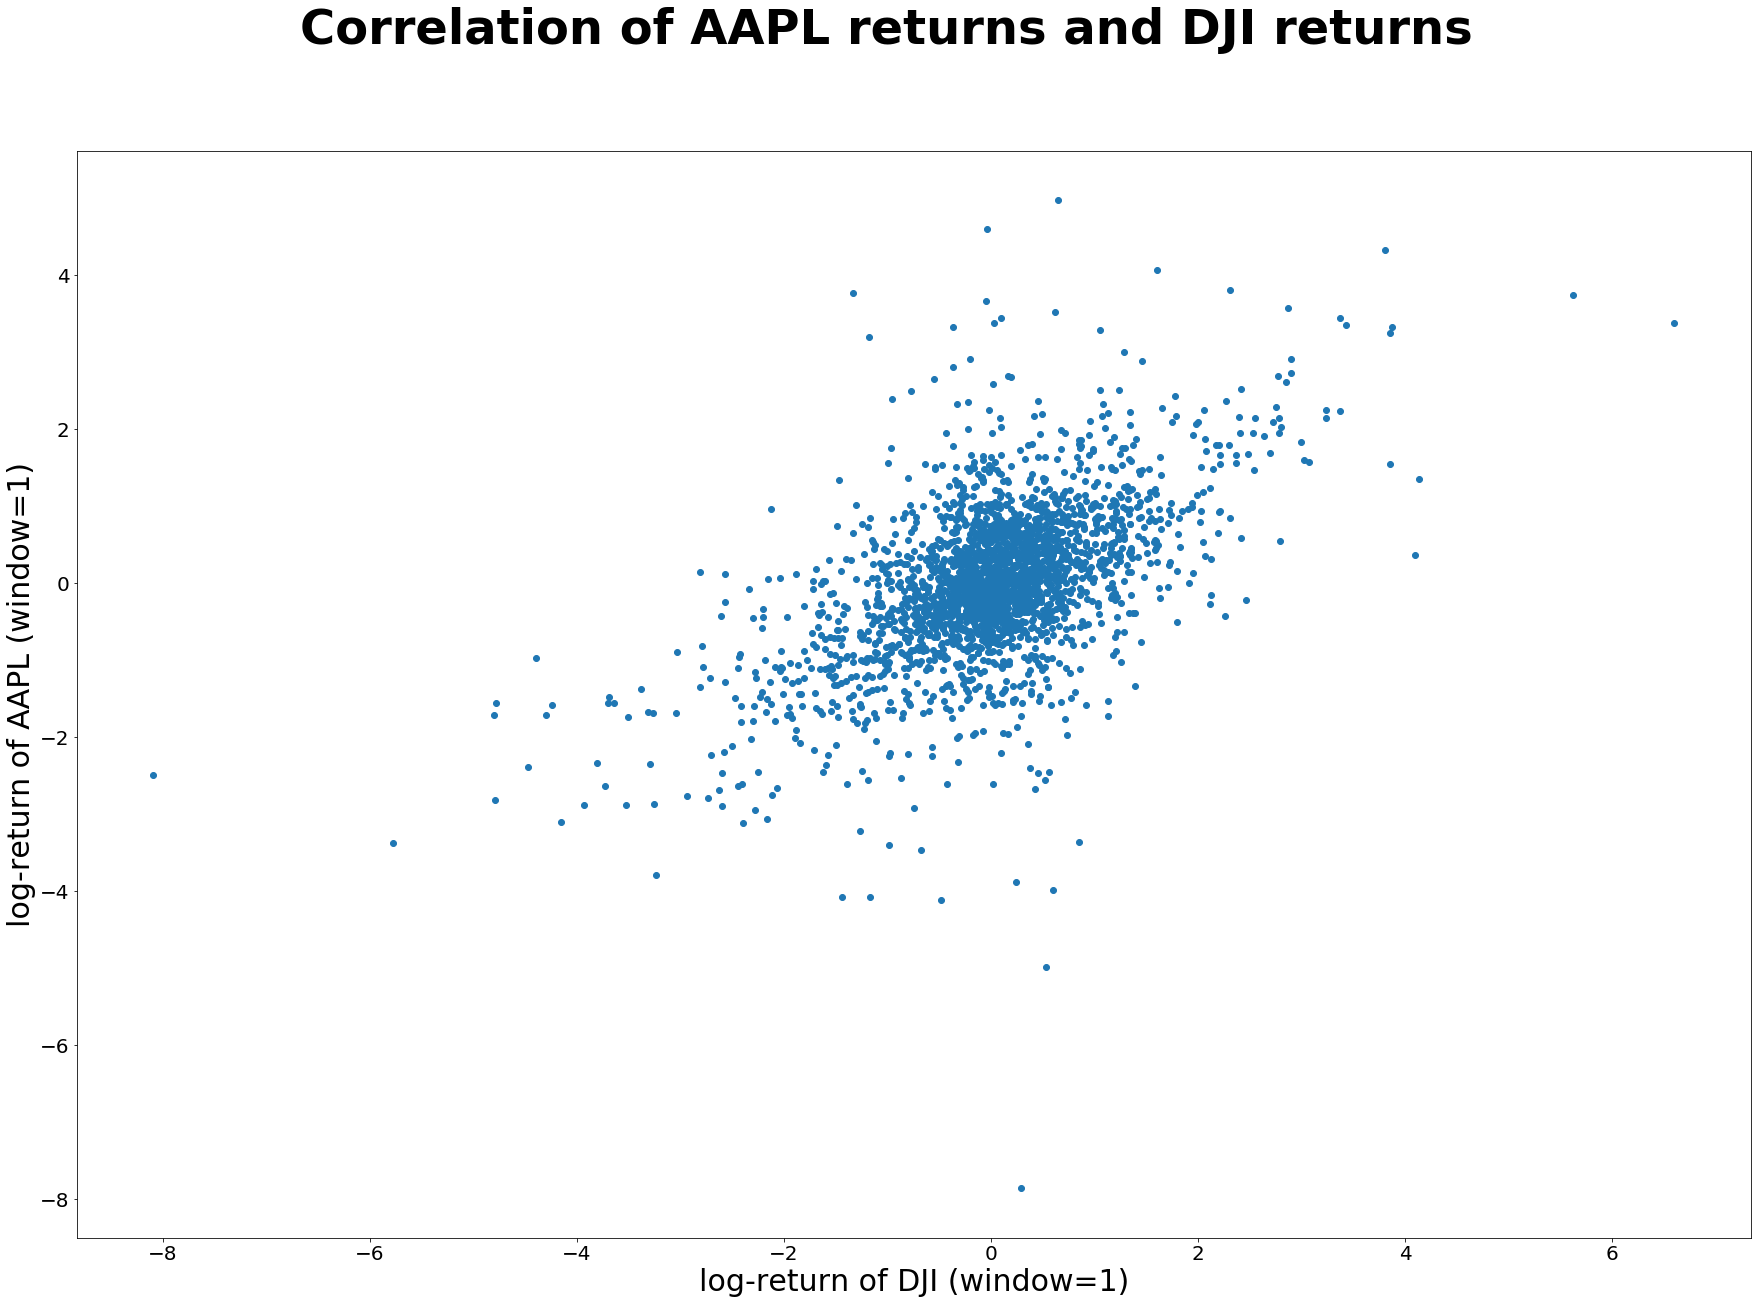

In [16]:
fig, ax_list = plt.subplots(1, 1, figsize=(30,20))
plt.suptitle("Correlation of AAPL returns and DJI returns", fontsize = 48, fontweight='bold')
ax_list.scatter(standardized_asset_returns['DJI'].values.reshape((2517, 1)), standardized_asset_returns['AAPL'].values.reshape((2517, 1)))
plt.xlabel("log-return of DJI (window=1)", fontsize=30)
plt.ylabel("log-return of AAPL (window=1)", fontsize=30)
ax_list.tick_params(labelsize=20)
plt.show()

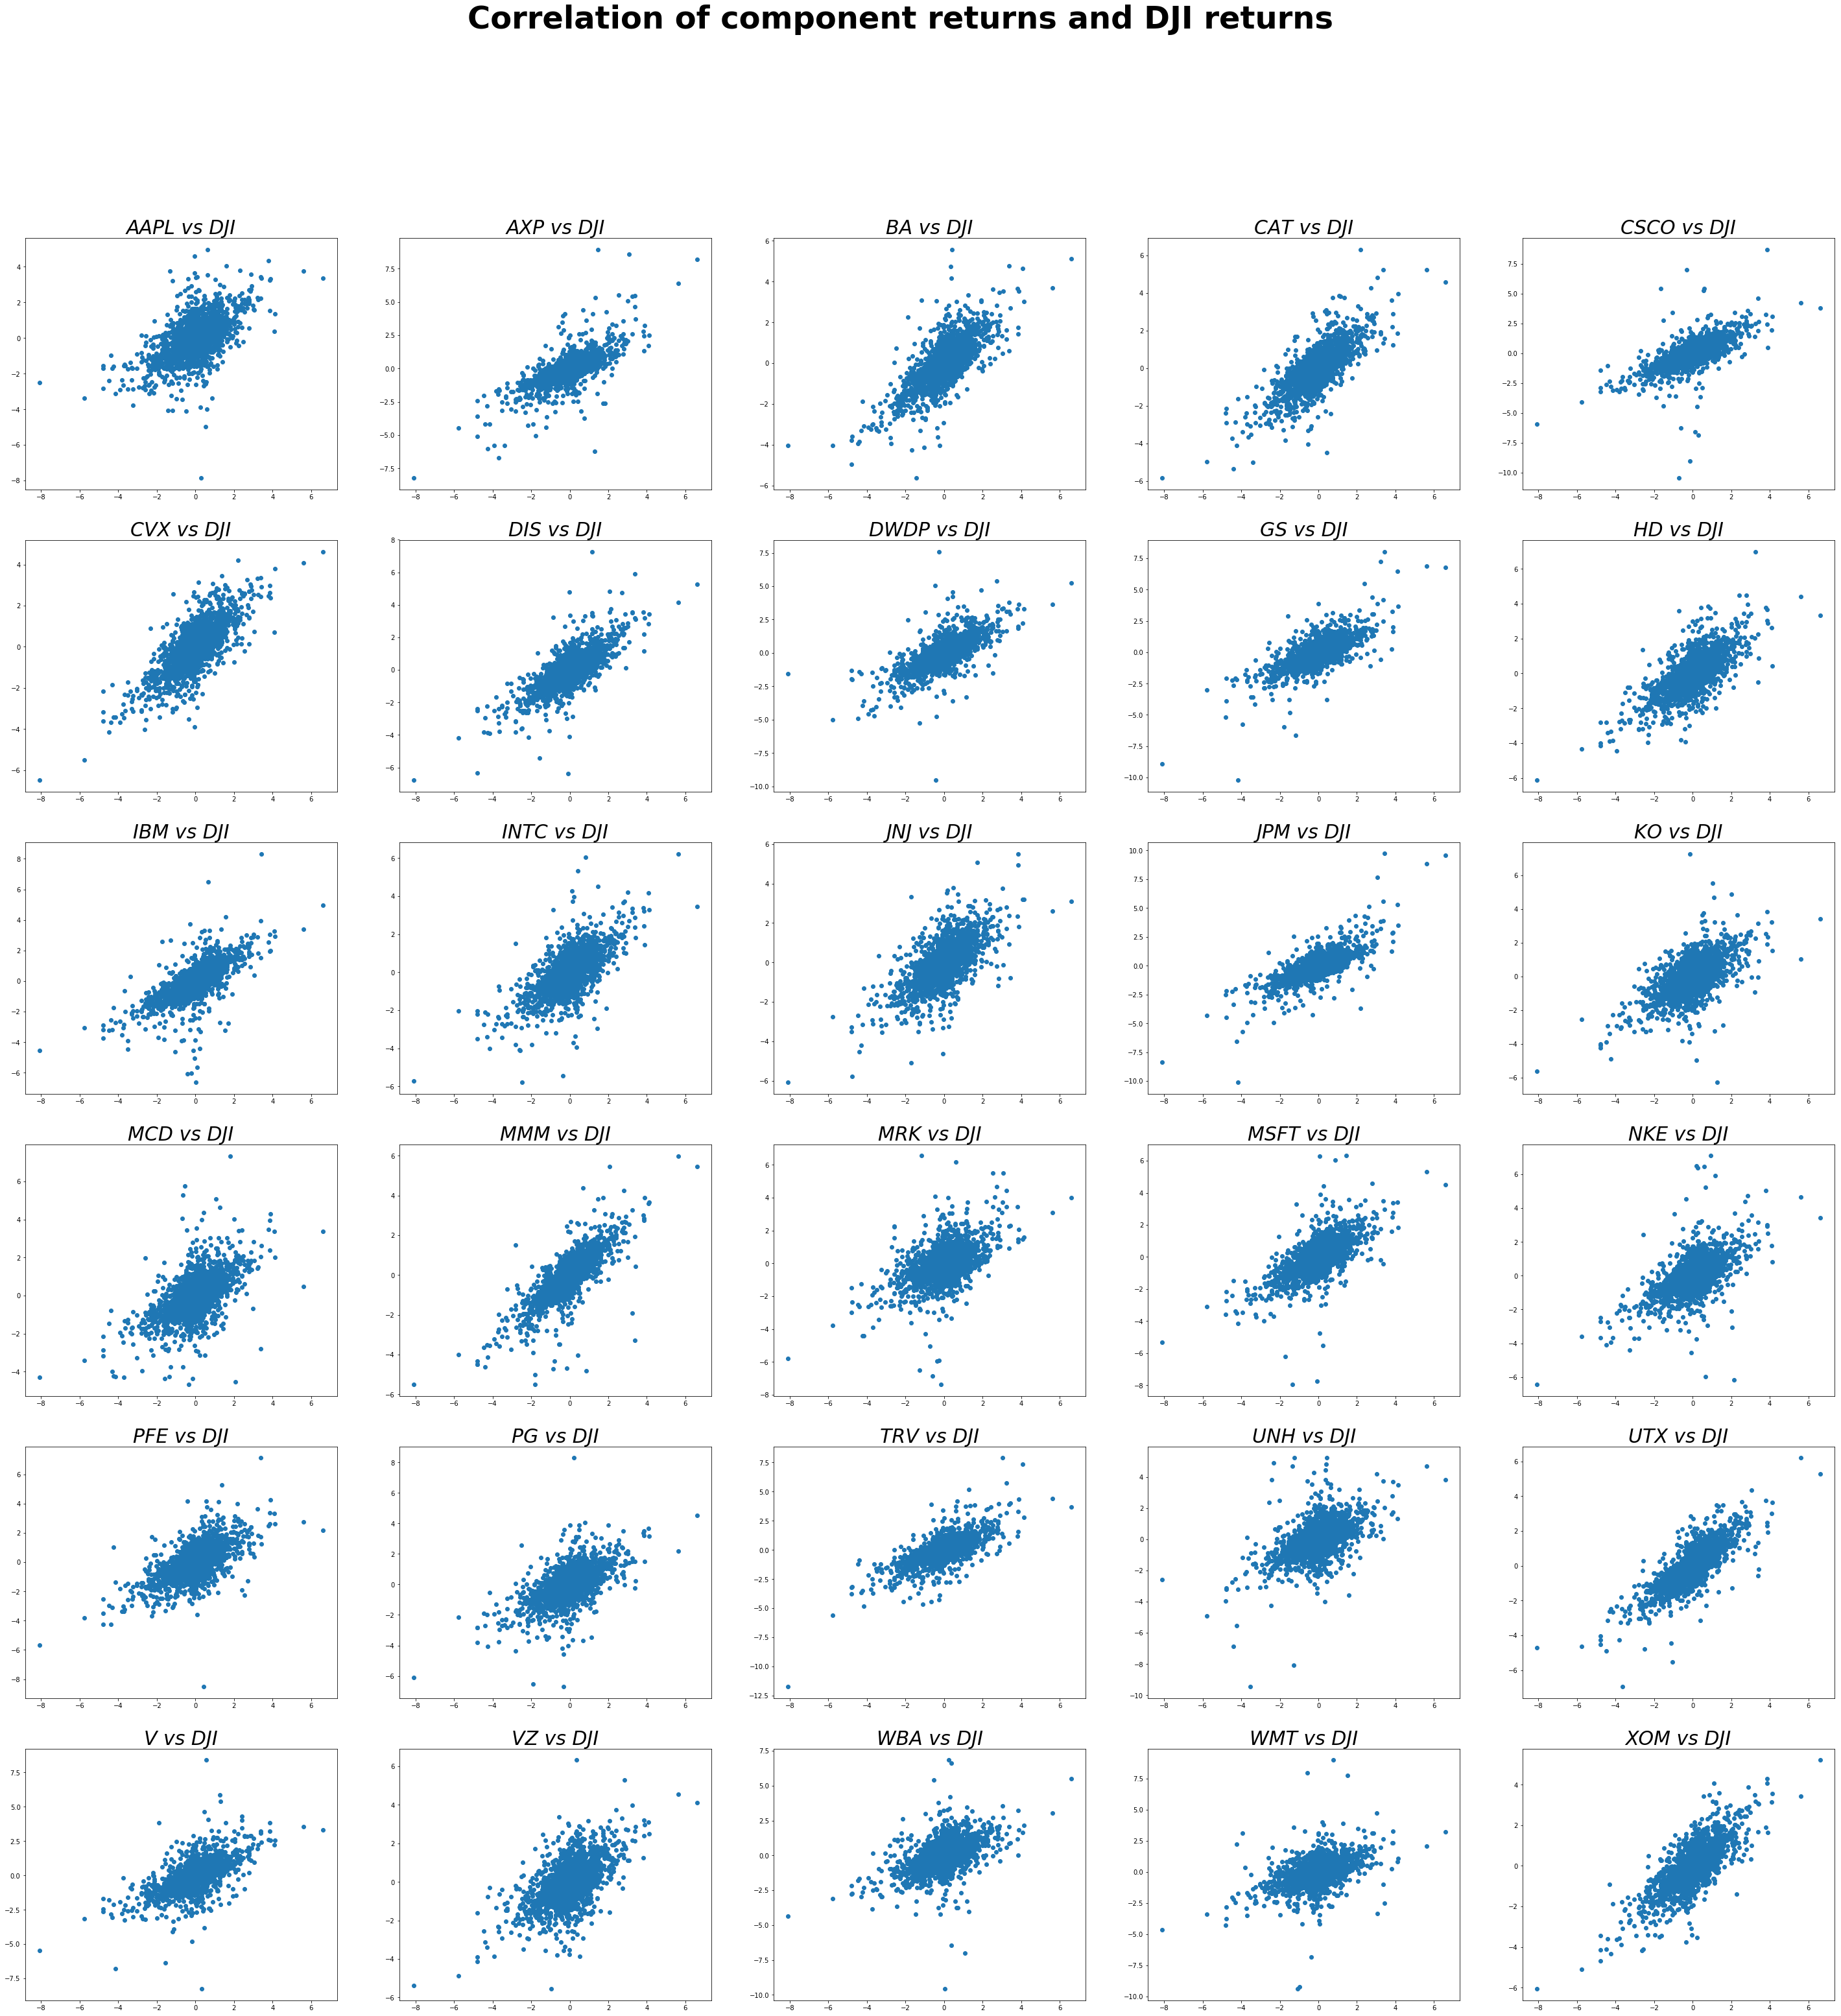

In [40]:
fig, ax_list = plt.subplots(6, 5, figsize=(50,50))
plt.suptitle("Correlation of component returns and DJI returns", fontsize = 48, fontweight='bold')

dji = standardized_asset_returns['DJI'].values.reshape((2517, 1))
column_names = standardized_asset_returns.columns.values
for i in range(standardized_asset_returns.shape[1]-1):
    ax_list[int(i/5)][i%5].set_title('{} vs DJI'.format(column_names[i]), fontstyle='italic', fontsize = 30)
    ax_list[int(i/5)][i%5].scatter(dji, standardized_asset_returns.iloc[:,i].values.reshape((2517, 1)))
plt.show()

In [17]:
train_percentage = 0.7

df_train = standardized_asset_returns.iloc[:int(standardized_asset_returns.shape[0]*0.7), :]
df_test = standardized_asset_returns.iloc[int(standardized_asset_returns.shape[0]*0.7):, :]
print("dimensions of training set: ", df_train.shape)
print("dimensions of testing set: ", df_test.shape)
df_train.tail()

dimensions of training set:  (1761, 31)
dimensions of testing set:  (756, 31)


,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2015-11-17,-0.312104,-0.399105,0.634227,-0.754911,0.020647,-0.333504,0.076877,-0.026031,-0.423175,3.004688,...,-0.314663,-0.126301,0.230761,-0.245132,-0.110615,0.050653,0.815087,3.011840,-0.934494,-0.004883
2015-11-18,1.784146,0.663958,0.844407,0.654906,0.656030,0.888338,1.088354,1.272899,0.760811,0.143691,...,1.068625,1.177728,1.380161,0.094660,1.180917,0.543151,1.154220,1.435601,0.778700,1.370988
2015-11-19,0.686617,0.359009,0.337088,-0.242824,0.518882,-1.065635,0.274770,0.109435,-0.178044,0.120788,...,0.400497,0.177885,-3.451672,0.425117,-0.290408,0.689405,-1.317398,-0.349810,-0.436203,-0.067178
2015-11-20,0.198201,-0.241454,0.015671,0.785331,0.406858,-1.426396,0.708230,-0.026031,-0.413744,1.788012,...,-0.531452,0.465564,1.160557,-0.090357,-0.026755,-0.721408,-0.777747,-0.929159,-0.508826,0.472587
2015-11-23,-0.833974,-0.149597,-0.473567,-0.110779,-0.324355,0.769010,-0.400072,-0.297375,-0.601335,1.176738,...,0.180940,-0.154561,-0.480565,-0.128844,-0.117300,-0.784249,0.030611,0.254693,0.491610,-0.217875


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

tickers = standardized_asset_returns.columns.values[:-1]
lr = LinearRegression()
alphas = [0.] * len(tickers)
betas = [0.] * len(tickers)
r2_in_sample = [0.] * len(tickers)
r2_out_sample = [0.] * len(tickers)
tickers

array(['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'DWDP', 'GS',
       'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WBA',
       'WMT', 'XOM'], dtype=object)

In [19]:
for i, stock in enumerate(tickers):
    lr.fit(df_train['DJI'].values.reshape((1761, 1)), df_train[stock].values.reshape((1761, 1)))
    alphas[i] = lr.intercept_[0]
    betas[i] = lr.coef_[0][0]
           
    predictions = lr.predict(df_train['DJI'].values.reshape((1761, 1)))
    r2_in_sample[i] = r2_score(df_train[stock], predictions)
    
    predictions = lr.predict(df_test['DJI'].values.reshape((756, 1)))
    r2_out_sample[i] = r2_score(df_test[stock], predictions)
# R2 score: https://en.wikipedia.org/wiki/Coefficient_of_determination

In [20]:
lr.fit(df_train['DJI'].values.reshape((1761, 1)), df_train['AAPL'].values.reshape((1761, 1)))
alpha = lr.intercept_[0]
beta = lr.coef_[0][0]
predictions = lr.predict(df_train['DJI'].values.reshape((1761, 1)))

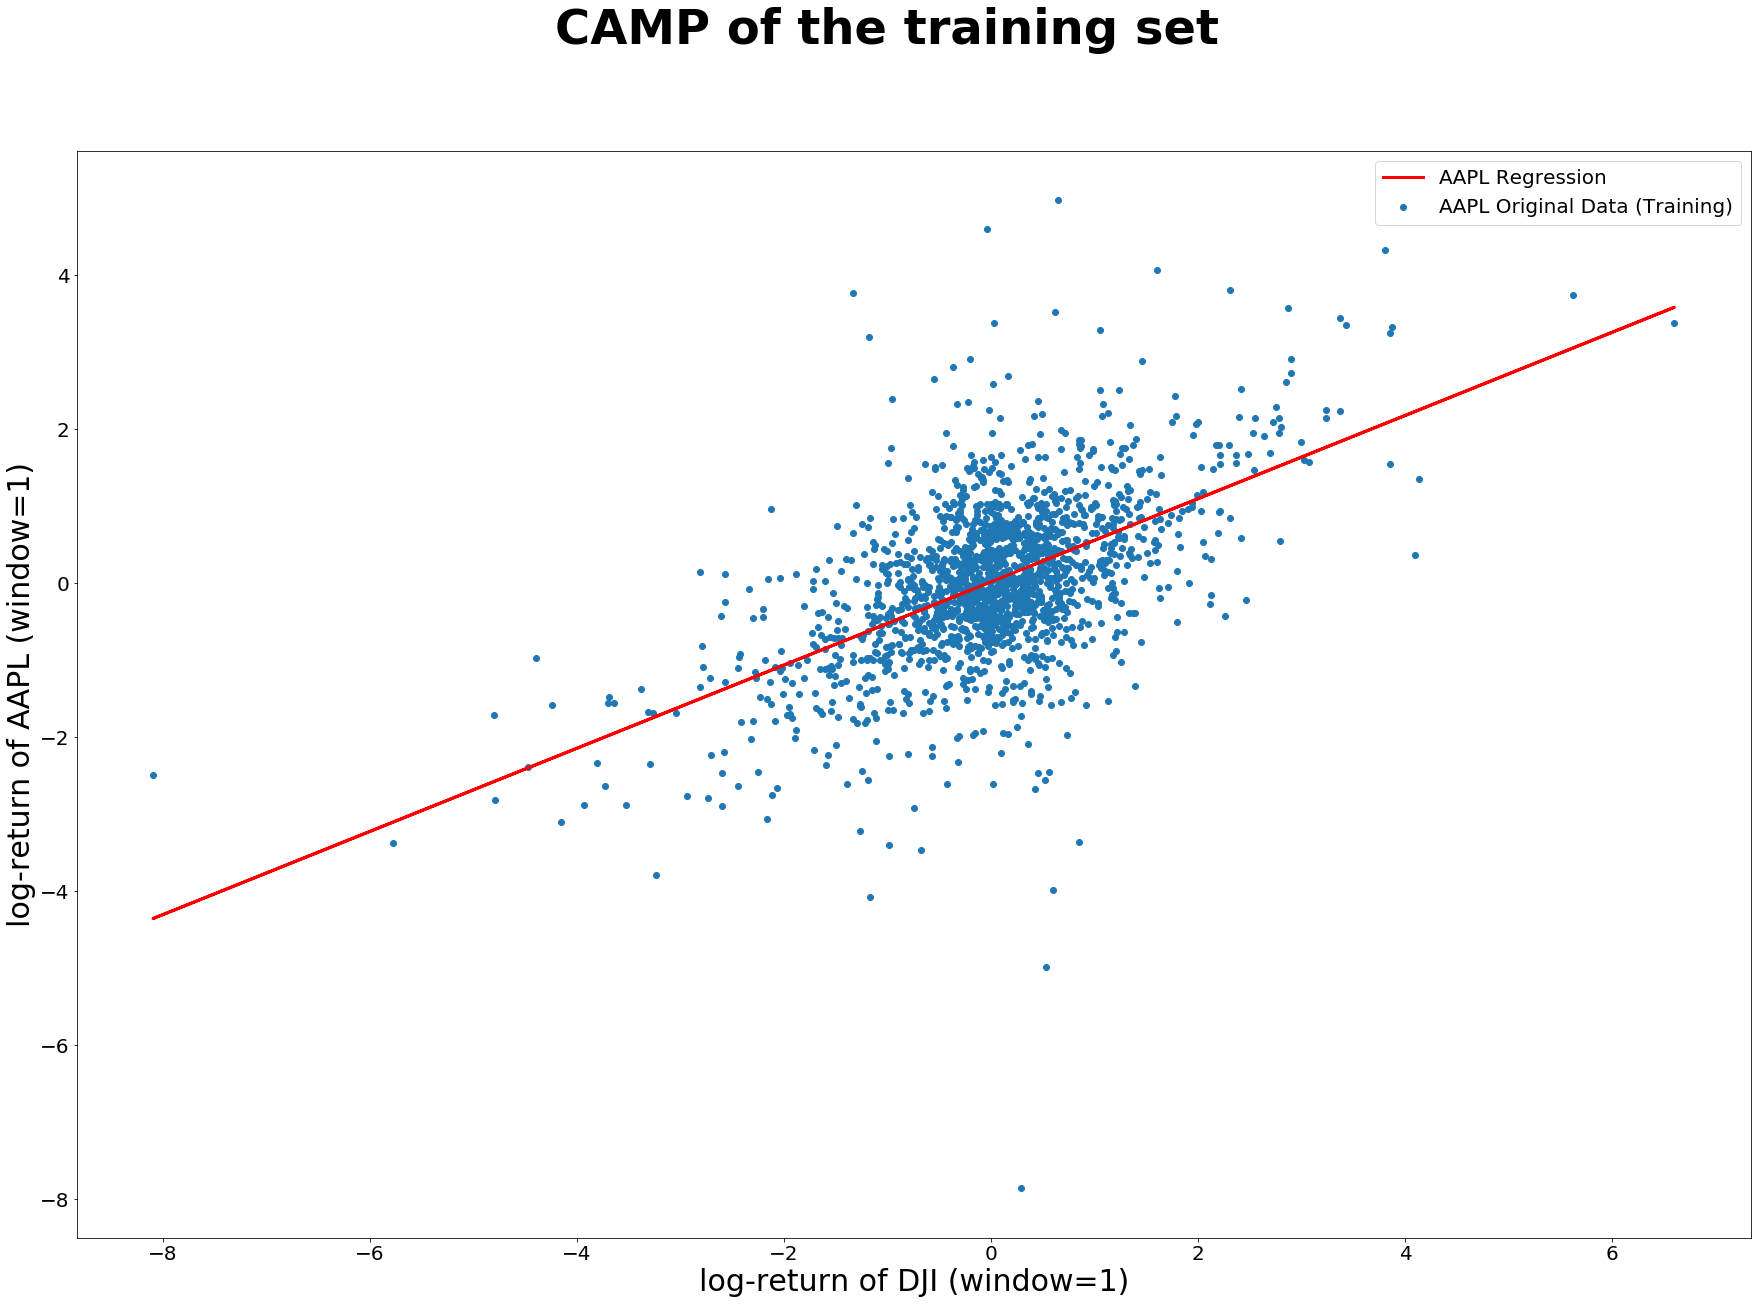

In [21]:
fig, ax_list = plt.subplots(1, 1, figsize=(30,20))
plt.suptitle("CAMP of the training set", fontsize = 48, fontweight='bold')
ax_list.scatter(df_train['DJI'].values.reshape((1761, 1)), df_train['AAPL'].values.reshape((1761, 1)), label='AAPL Original Data (Training)')
ax_list.plot(df_train['DJI'].values.reshape((1761, 1)), predictions, label='AAPL Regression', color='red', linewidth=3)
plt.xlabel("log-return of DJI (window=1)", fontsize=30)
plt.ylabel("log-return of AAPL (window=1)", fontsize=30)
ax_list.tick_params(labelsize=20)
plt.legend(fontsize=20)
plt.show()

In [22]:
lr.fit(df_train['DJI'].values.reshape((1761, 1)), df_train['AAPL'].values.reshape((1761, 1)))
alpha = lr.intercept_[0]
beta = lr.coef_[0][0]
predictions = lr.predict(df_test['DJI'].values.reshape((756, 1)))

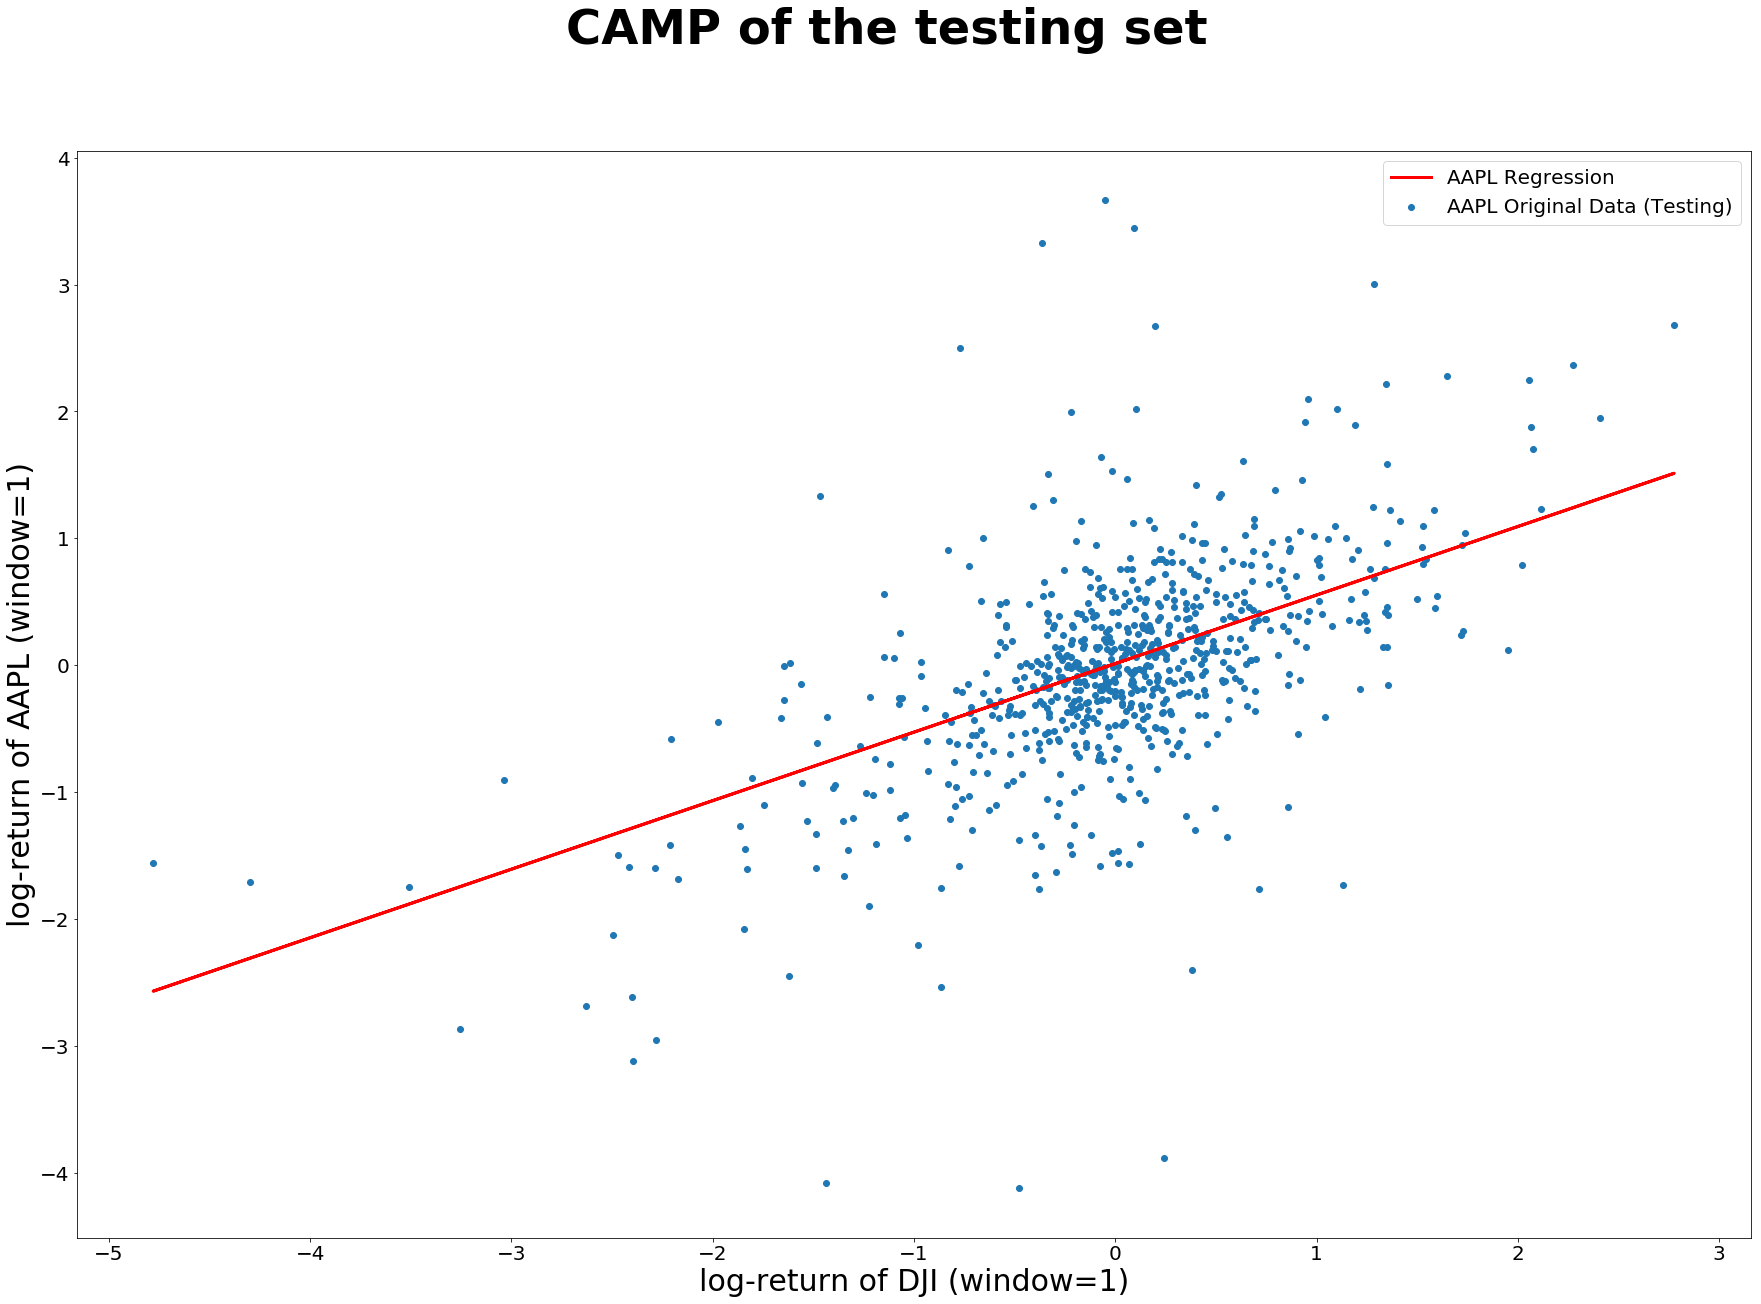

In [23]:
#date = np.array([datetime.datetime.strptime(t, '%Y-%m-%d').date() for t in np.array(df_train.index)])

fig, ax_list = plt.subplots(1, 1, figsize=(30,20))
plt.suptitle("CAMP of the testing set", fontsize = 48, fontweight='bold')
ax_list.scatter(df_test['DJI'].values.reshape((756, 1)), df_test['AAPL'].values.reshape((756, 1)), label='AAPL Original Data (Testing)')
ax_list.plot(df_test['DJI'].values.reshape((756, 1)), predictions, label='AAPL Regression', color='red', linewidth=3)
plt.xlabel("log-return of DJI (window=1)", fontsize=30)
plt.ylabel("log-return of AAPL (window=1)", fontsize=30)
ax_list.tick_params(labelsize=20)
plt.legend(fontsize=20)
plt.show()

In [24]:
df_results = pd.DataFrame({'Alpha':alphas, 'Beta':betas, 'R2 in-sample':r2_in_sample, 'R2 out-sample':r2_out_sample},
                          index=tickers)
df_results

,Alpha,Beta,R2 in-sample,R2 out-sample
AAPL,0.012884,0.540214,0.302781,0.323307
AXP,0.002493,0.778564,0.555189,0.210315
BA,-0.004761,0.721516,0.561934,0.509038
CAT,-0.005464,0.765893,0.609088,0.494331
CSCO,-0.006435,0.669297,0.445433,0.459051
CVX,-0.004447,0.762649,0.639511,0.361433
DIS,0.020287,0.797565,0.617386,0.267576
DWDP,0.007085,0.733037,0.498082,0.329535
GS,0.008293,0.726647,0.511405,0.566066
HD,0.014941,0.706463,0.501144,0.411090
